# Notebook: Processing Lab Data

**Description:** Workflow to process and clean lab data for further analysis and merging with well logs.

---

## Table of Contents

1. [Introduction](#1-introduction)
2. [Lab Data](#2-lab-data)
3. [Setup](#3-setup)
4. [Step 1: Load Lab Data](#4-step-1-load-lab-data)
5. [Step 2: Clean Lab Data](#5-step-2-clean-lab-data)
6. [Step 3: Standardize Units](#6-step-3-standardize-units)
7. [Step 4: Visualize Cleaned Lab Data](#7-step-4-visualize-cleaned-lab-data)
8. [Step 5: Export Processed Lab Data](#8-step-5-export-processed-lab-data)

---

## 1. Introduction

Laboratory data provides essential information about rock and fluid properties, which are critical for geothermal analysis. However, raw lab data often contains inconsistencies, missing values, and outliers that must be addressed before analysis.  

This notebook focuses on:  
1. **Loading Lab Data:** Importing raw CSV data into a structured format.  
2. **Cleaning Lab Data:** Removing unnecessary columns, renaming columns for clarity, and organizing the dataset.  
3. **Standardizing Units:** Ensuring all measurements are in consistent units (e.g., converting porosity from percentage to fraction).  
4. **Visualizing Cleaned Data:** Inspecting the cleaned data using plots to identify potential issues or inconsistencies.  
5. **Exporting Processed Data:** Saving the cleaned dataset for integration with well-log data.  

The resulting dataset will be well-structured and ready for downstream analysis or machine learning tasks.  



## 2. Lab Data

Lab data includes various measured properties derived from physical and thermal experiments conducted on rock samples. These properties provide insights into subsurface conditions, essential for geothermal exploration.

### **Properties of Interest**  

| **Property**                          | **Unit**             | **Description**                          |  
|---------------------------------------|----------------------|------------------------------------------|  
| Depth                                 | m                    | Depth at which the sample was taken.     |  
| Vp (P-wave velocity)                  | m/s                  | Speed of compressional waves in the rock.|  
| Vs (S-wave velocity)                  | m/s                  | Speed of shear waves in the rock.        |  
| Bulk Density (calculated)             | kg/m³                | Density of the rock sample.              |  
| Thermal Conductivity                  | W/mK                 | Ability of the material to conduct heat. |  
| Thermal Diffusivity                   | mm²/s                | Rate at which heat spreads through the material.|  
| Porosity                              | %vb                  | Percentage of void spaces in the rock.   |  
| Acoustic Impedance                    | m/s * g/cc           | Product of density and P-wave velocity.  |  

---


## 3. Setup

Import necessary libraries, define well IDs, and specify the properties of interest.

In [1]:
# Import libraries
import pandas as pd
import sys
sys.path.append("../.")

from geothermal_prediction.visualization import plot_properties_by_well
from geothermal_prediction.utils import save_to_csv


In [2]:
# Define wells and logs
list_wells = ['E18-05', 'K18-07x', 'K18-08', 'ZRP-03a']
list_properties = ['Density', 'Porosity', 'Vp', 'Vs', 'Acoustic_Imp', 'Th_Cond', 'Th_Diff']

## 4. Step 1: Load Lab Data

Load the raw lab data from a CSV file into a pandas DataFrame.

In [3]:
lab_data = pd.read_csv(filepath_or_buffer=r'../data/raw/lab/lab_data.csv')

## 5. Step 2: Clean Lab Data

Perform cleaning tasks such as dropping columns, renaming columns, organize the columns logically and sort by well and depth.

In [4]:
# Remove unnecessary columns
columns_to_remove = ['core number', 'sample number', 'volumetric heat capacity (MJ/m3K)',
                     'trimend', 'plug availability', 'size terms', 'Vp/Vs', 
                     'Formation', 'specific heat capacity (KJ/kgK)']

lab_data.drop(columns=columns_to_remove, inplace=True, errors='ignore')

# Rename columns
lab_data.rename(columns={
    'well code': 'Well_ID', 
    'depth (m)' : 'Depth',
    'bulk_density_calculated_kg/m3': 'Density',
    'acoustic impedance (m/s*g/cc)': 'Acoustic_Imp',
    'porosity_%vb': 'Porosity',
    'Vp_m/s': 'Vp', 
    'Vs_m/s': 'Vs',
    'thermal conductivity (W/mK)': 'Th_Cond', 
    'thermal diffusivity (mm2/s)': 'Th_Diff'
}, inplace=True)

# Reorder columns
columns_order = ['Well_ID', 'Depth', 'Density', 'Porosity', 'Vp', 'Vs', 'Acoustic_Imp', 'Th_Cond', 'Th_Diff']
lab_data = lab_data[columns_order]

# Sort data by well and depth
lab_data.sort_values(by=['Well_ID', 'Depth'], ascending=[True, True], inplace=True)

# Reset the index after sorting
lab_data.reset_index(drop=True, inplace=True)

## 6. Step 3: Standardize Units

Ensure all units are consistent. For example, convert porosity from percentage to fraction.

In [5]:
# Standardize units (convert porosity to fraction)
if 'Porosity' in lab_data.columns:
    lab_data['Porosity'] = lab_data['Porosity'] / 100

## 7. Step 4: Visualize Cleaned Lab Data

Visualize the cleaned lab data to inspect its quality.

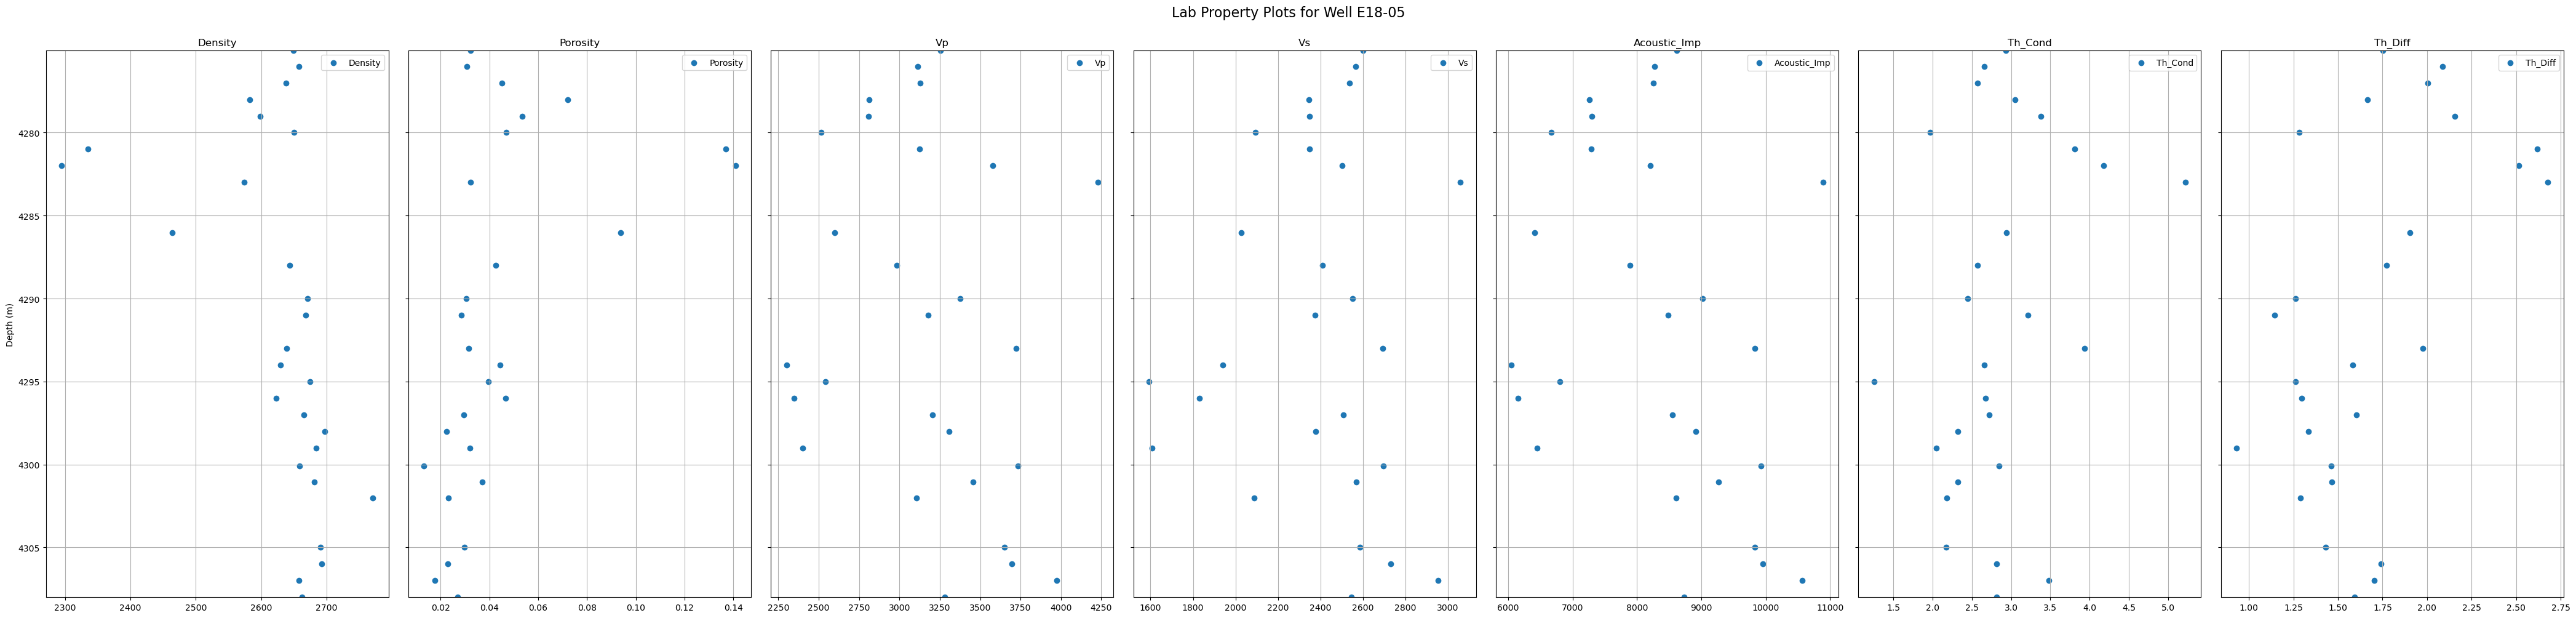

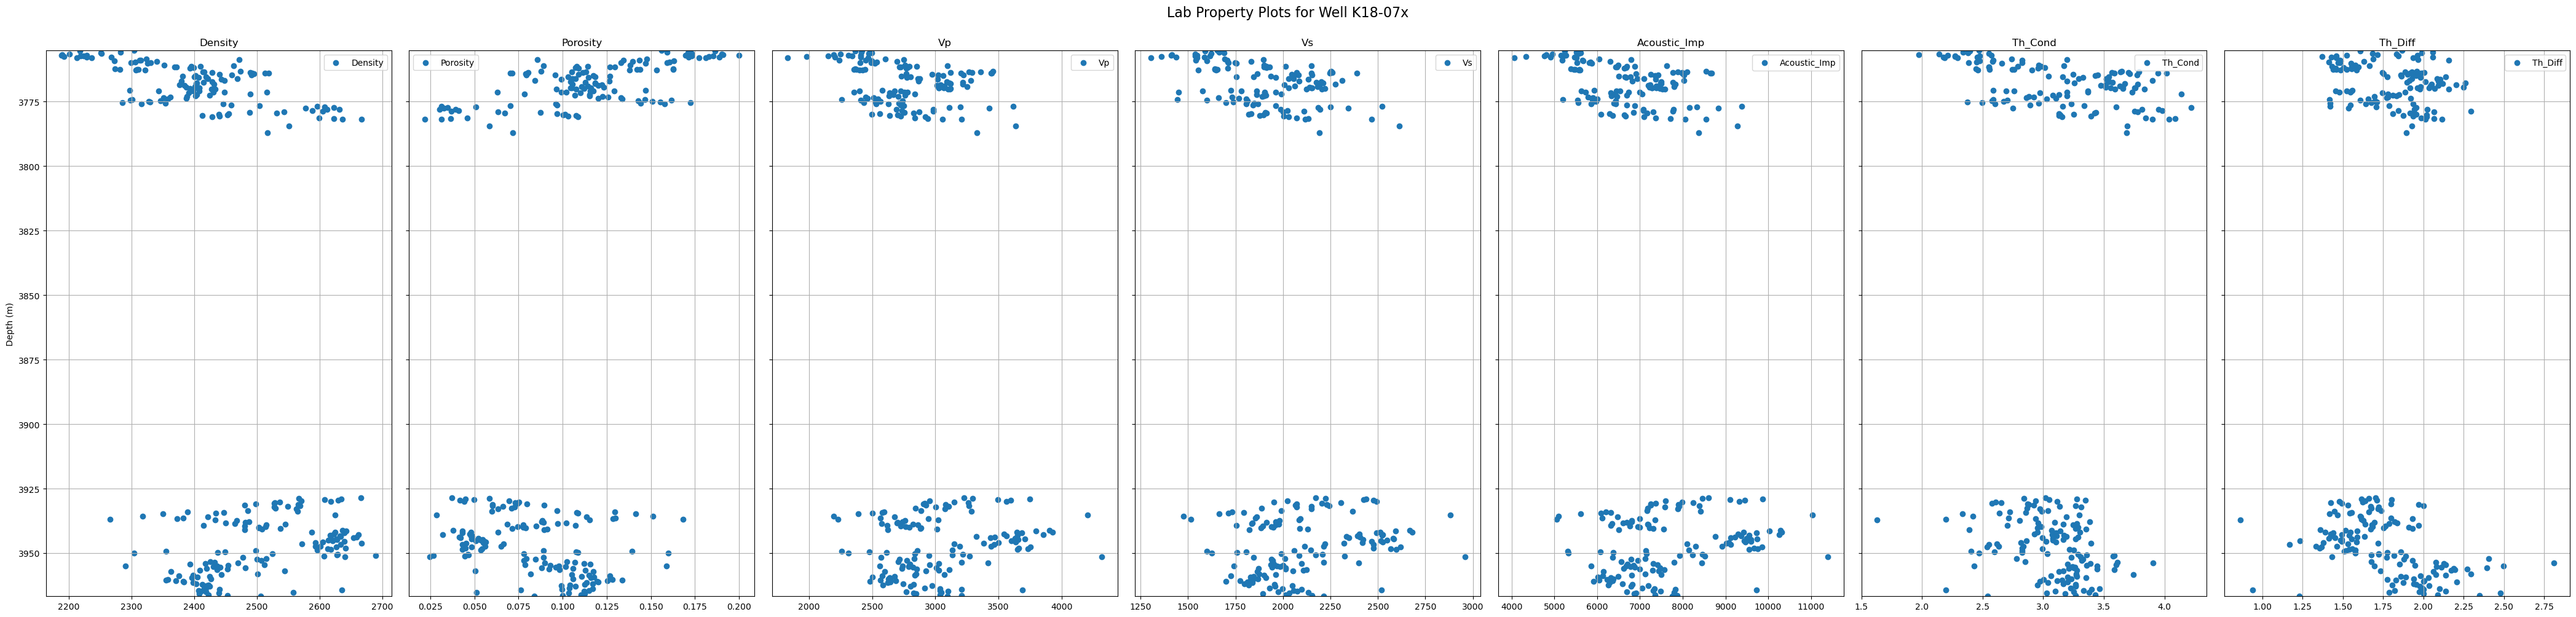

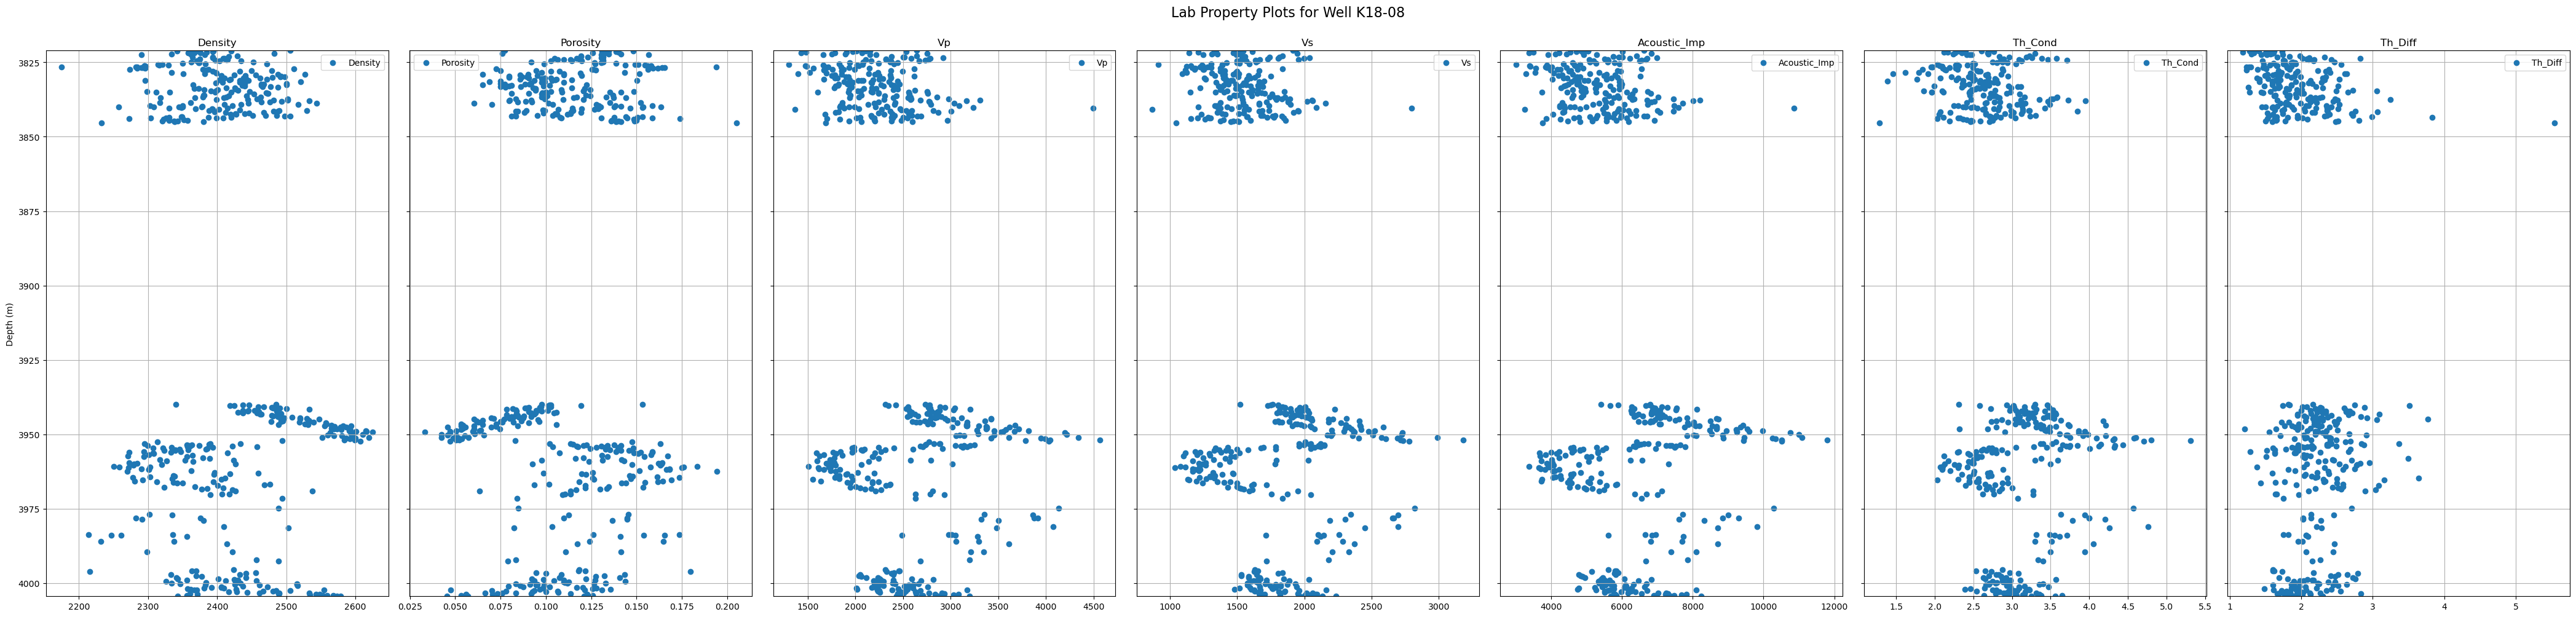

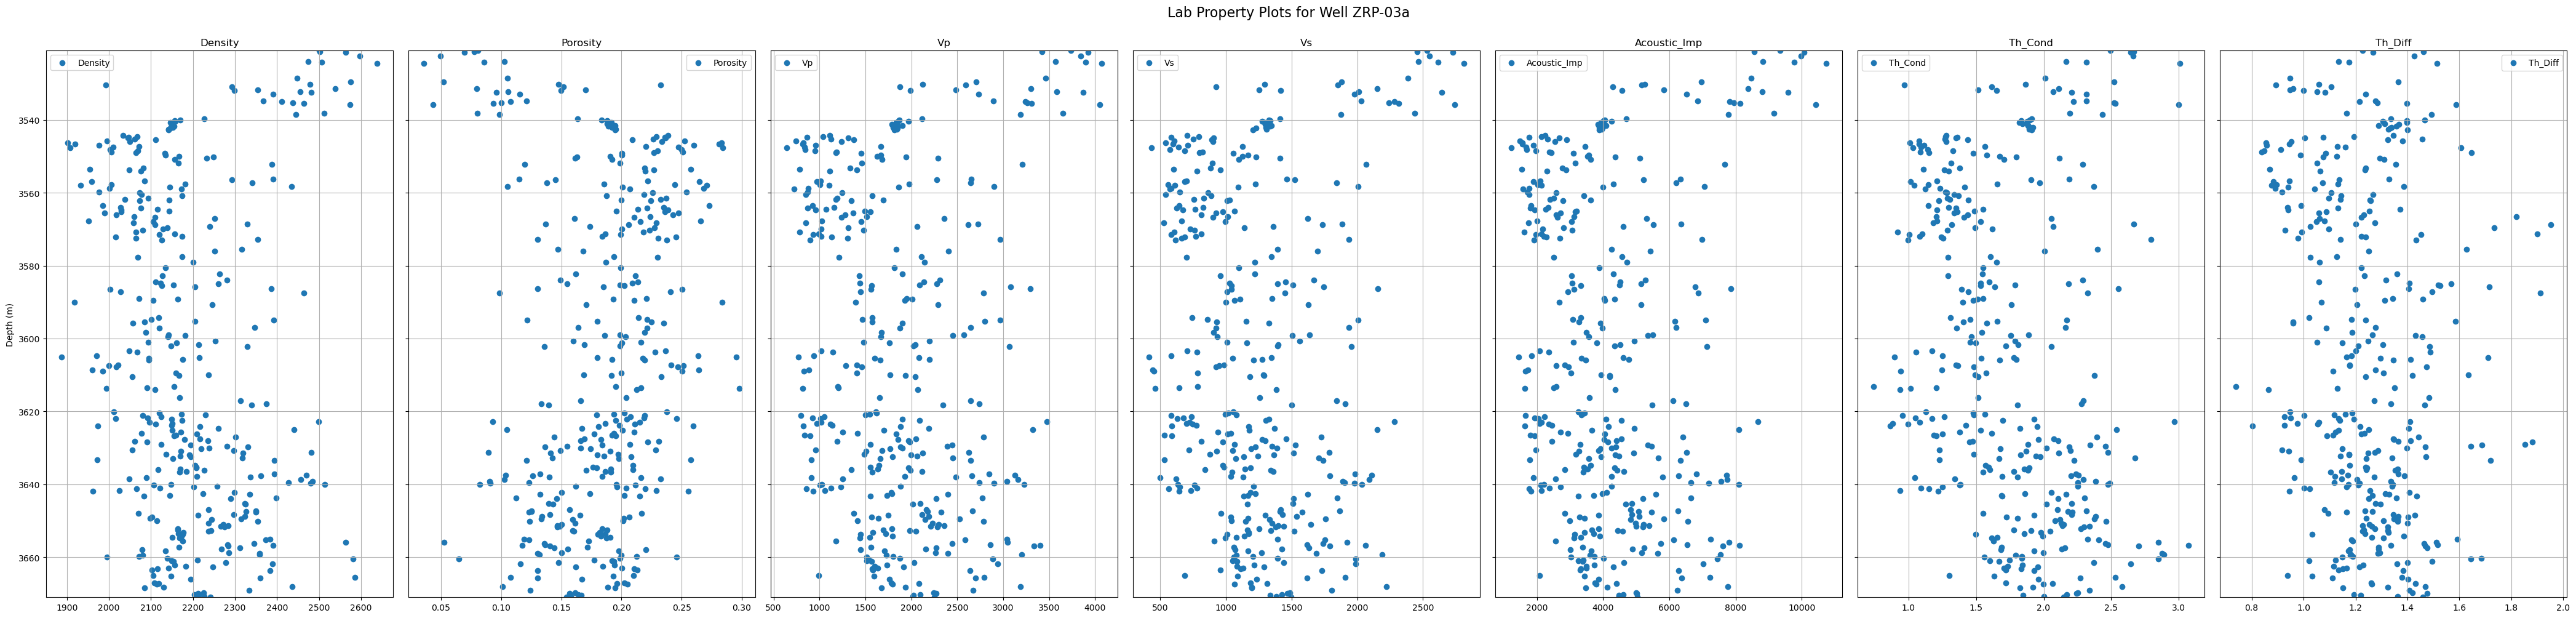

In [6]:
for well_name in list_wells:
    plot_properties_by_well(lab_data, well_name, list_properties)

## 8. Step 5: Save Final Dataset

Save the cleaned dataset for further analysis or merging with well-log data.

In [7]:
save_to_csv(lab_data, 'final_lab_data', 'data/processed/')

File saved successfully
